Text(0.5, 1.0, 'Value')

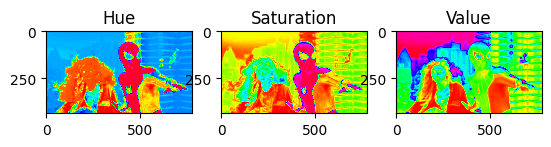

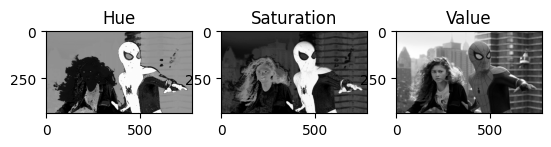

In [37]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('spider.png', cv.IMREAD_COLOR)
imgc = cv.cvtColor(img, cv.COLOR_BGR2RGB)
imgh = cv.cvtColor(img, cv.COLOR_BGR2HSV)
h_img, s_img , v_img = cv.split(imgh)

fig, ax= plt.subplots(1,3)
ax[0].imshow(h_img, cmap='hsv')
ax[0].set_title('Hue')
ax[1].imshow(s_img, cmap='hsv')
ax[1].set_title('Saturation')
ax[2].imshow(v_img, cmap='hsv')
ax[2].set_title('Value')

fig, ax= plt.subplots(1,3)
ax[0].imshow(h_img, cmap='gray')
ax[0].set_title('Hue')
ax[1].imshow(s_img, cmap='gray')
ax[1].set_title('Saturation')
ax[2].imshow(v_img, cmap='gray')
ax[2].set_title('Value')





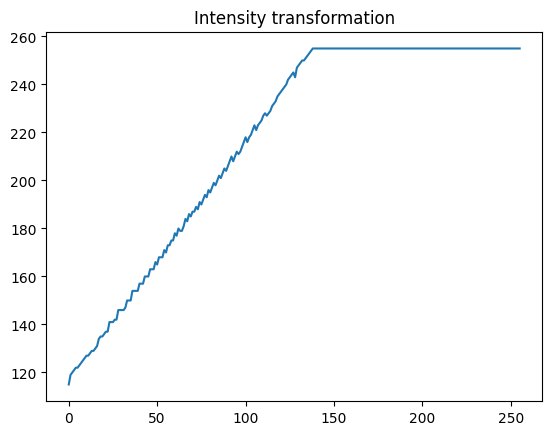

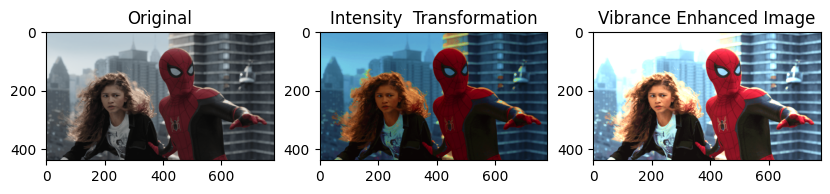

In [36]:
x= np.arange(0, 256).astype('uint8')
a = .9
sigma = 70
Y = np.minimum(((x)+(a*(np.exp(-(x-128)**2/(2*sigma**2))))*128), 255).astype('uint8')
image_transform = cv.LUT(s_img, Y)
plt.title('Intensity transformation')
plt.plot(Y)
plt.show()

newHSV = cv.merge([h_img,image_transform,v_img])
result =  cv.cvtColor(newHSV,  cv.COLOR_HSV2BGR)
newHSV1 = cv.cvtColor(result, cv.COLOR_BGR2RGB)
added_img = cv.add(newHSV1, imgc)


fig, ax= plt.subplots(1,3, figsize=(10,20))
ax[0].imshow(imgc)
ax[0].set_title('Original')
ax[1].imshow(newHSV1)
ax[1].set_title('Intensity  Transformation')
ax[2].imshow(added_img)
ax[2].set_title('Vibrance Enhanced Image')
plt.show()